In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

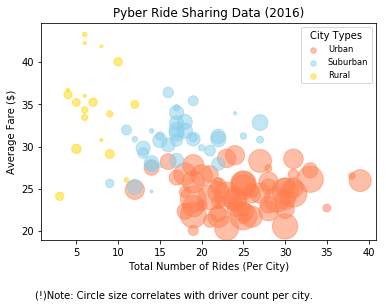

In [37]:
# Obtain the x and y coordinates for each of the three city types

#Create dataframes for each city type for variables to be pulled from
rural_towns_df = pyber_df[pyber_df["type"] == "Rural"]
suburbs_df = pyber_df[pyber_df["type"] == "Suburban"]
urban_cities_df = pyber_df[pyber_df["type"] == "Urban"]

# Build the scatter plots for each city types
plt.scatter(urban_cities_df.groupby(["city"]).count()["ride_id"], 
            urban_cities_df.groupby(["city"]).mean()["fare"], 
            s=10*(urban_cities_df.groupby(["city"]).mean()["driver_count"]), 
            c="coral", 
            alpha=0.5, 
            label="Urban")

plt.scatter(suburbs_df.groupby(["city"]).count()["ride_id"], 
            suburbs_df.groupby(["city"]).mean()["fare"], 
            s=10*(suburbs_df.groupby(["city"]).mean()["driver_count"]),
            c="skyblue", 
            #edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, 
            label="Suburban")

plt.scatter(rural_towns_df.groupby(["city"]).count()["ride_id"], 
            rural_towns_df.groupby(["city"]).mean()["fare"], 
            s=10*(rural_towns_df.groupby(["city"]).mean()["driver_count"]),
            c="gold",  
            alpha=0.5, 
            label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
#plt.grid(True)

# Create a legend
legend = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(0, 12, "(!)Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("CityTypeScatterPlot.png")

# Show plot
plt.show()

## Total Fares by City Type

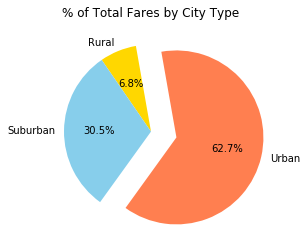

In [38]:
# Calculate Type Percents
total_fare_per_city_type = pyber_df.groupby(["type"]).sum()["fare"]
pyber_total_fare = pyber_df["fare"].sum()

fare_by_city_type_percent = total_fare_per_city_type / pyber_total_fare * 100

# Build Pie Chart
plt.pie(fare_by_city_type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"], 
        explode=[0, 0, 0.3], 
        autopct='%1.1f%%', 
        startangle=100),

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("PercentOfTotalFaresByCityTypePieChart.png")

# Show Figure
plt.show()

In [39]:
# Show Figure
plt.show()

## Total Rides by City Type

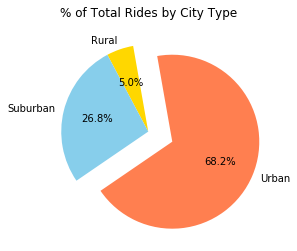

In [40]:
# Calculate Type Percents
total_rides_per_city_type = pyber_df.groupby(["type"]).sum()["ride_id"]
pyber_total_rides = pyber_df["ride_id"].sum()

rides_by_city_type_percent = total_rides_per_city_type / pyber_total_rides * 100

# Build Pie Chart
plt.pie(rides_by_city_type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"],
        explode=[0, 0, 0.3],
        autopct='%1.1f%%',
        startangle=100)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("PercentOfTotalRidesByCityTypePieChart.png")

# Show Figure
plt.show()

In [41]:
# Show Figure
plt.show()

## Total Drivers by City Type

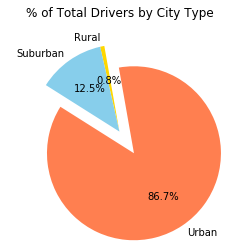

In [42]:
# Calculate Type Percents
total_drivers_per_city_type = pyber_df.groupby(["type"]).sum()["driver_count"]
pyber_total_drivers = pyber_df["driver_count"].sum()

drivers_by_city_type_percent = total_drivers_per_city_type / pyber_total_drivers * 100

# Build Pie Chart
plt.pie(drivers_by_city_type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"],
        explode=[0, 0, 0.3],
        autopct='%1.1f%%',
        startangle=100)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("PercentOfTotalDriversByCityTypePieChart.png")

# Show Figure
plt.show()

In [43]:
# Show Figure
plt.show()